# Satellite

In [1]:
from datastore import DataStore
from satellite import Satellite

We first load some datasets - whose paths have been specified in the config file - using the datastore. The satellite module will by default try to load antenna/tower coordinates, shapefiles defining (administrative) boundaries, the Relative Wealth Index for the country of interest, and population density raster data.

In [3]:
datastore = DataStore(cfg_dir='../../cider/configs/config.yml')
satellite = Satellite(datastore=datastore)

Loading antennas...


The module can aggregate the RWI - which provides an asset index measure at a resolution of 2.4km x 2.4km - at one of the geographic levels provided by the antennas/towers, in which case their voronoi tessellation will be used - or one of the loaded shapefiles. <br><br>
In this case, we have loaded (synthetic) data for the country of Togo, and for aggregations at the tower level we will run:

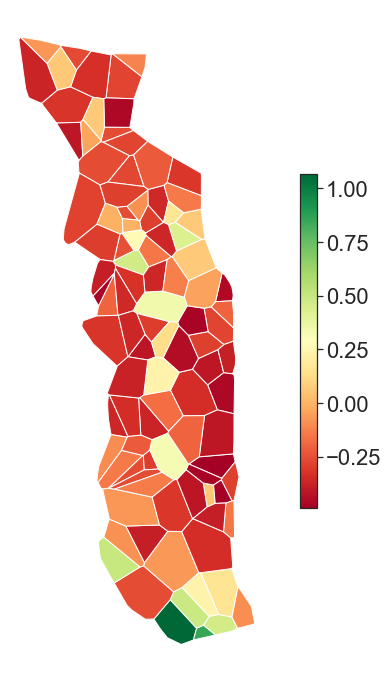

In [8]:
satellite.aggregate_scores(dataset='rwi', geo='tower_id')

while for cantons, admin level 3 in Togo, we will run:

../../cider/satellite.py:152: RuntimeWarning: invalid value encountered in double_scalars
  score = (score * pop).sum() / pop.sum()


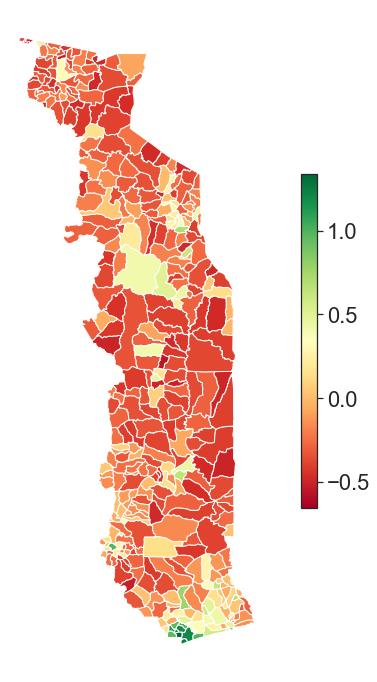

In [5]:
satellite.aggregate_scores(dataset='rwi', geo='cantons')

The table is also saved as a geojson, storing the identifier of each region, its score - in this case its Relative Wealth Index - its population, and its geometry.

In [7]:
import geopandas as gpd
gpd.read_file('../../cider/outputs/satellite/maps/cantons_rwi.geojson').head()

,region,score,pop,geometry
0,1,-0.283597,16017.569922,"MULTIPOLYGON (((0.75228 6.83786, 0.75137 6.840..."
1,2,-0.413565,4367.875125,"MULTIPOLYGON (((0.69026 6.80602, 0.69627 6.806..."
2,3,-0.394428,9757.760028,"MULTIPOLYGON (((0.63102 6.74430, 0.63295 6.747..."
3,4,-0.420952,2884.407900,"MULTIPOLYGON (((0.67259 6.85123, 0.67714 6.849..."
4,5,-0.112190,2907.861156,"MULTIPOLYGON (((0.75269 6.84116, 0.75137 6.840..."
